In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
from __future__ import print_function, division
import numpy as np
import os
import os.path as path
from os import listdir 
from os.path import isfile, join
import copy
import matplotlib.pyplot as plt
plt.style.use('classic')

In [13]:
# path
cwd = os.getcwd()
parts = cwd.split('/scripts/pretrained')
ROOT = parts[0]
os.chdir(ROOT)
import sys
sys.path.insert(0, ROOT)

In [14]:
category_codes = ['n01882714','n02086240','n02087394','n02094433','n02100583','n02100735','n02279972', 'mix']
category_names = ['koalas',   'shih-tzu', 'rhodesian','yorkshire','vizsla',   'setter',   'butterfly', 'mix']

In [15]:
results_folder = join(ROOT, 'data', 'pretrained', 'results_provided', 'hunchback_trained')

# uncomment this line if you want to check your own results
#results_folder = join(ROOT, 'data', 'pretrained', 'results', 'hunchback_trained')

In [16]:
archs = ['alexnet','vgg11', 'vgg13', 'vgg16','vgg19',
        'vgg11_bn','vgg13_bn', 'vgg16_bn', 'vgg19_bn',
         'resnet18', 'resnet34', 'resnet50','resnet101','resnet152'
        ]

In [17]:
ID = {}
for arch in archs:
    ID[arch] = np.load(join(results_folder, arch + '_ID.npy')) 
    
IDerr = {}
for arch in archs:
    IDerr[arch] = np.load(join(results_folder, arch + '_IDerr.npy'))  
    
PCA_DIM = {}
for arch in archs:
    PCA_DIM[arch] = np.load(join(results_folder, arch + '_PCA_DIM.npy'))  
    
EVR = {}
for arch in archs:
    EVR[arch] = np.load(join(results_folder, arch + '_EVR.npy'))  
    
SV = {}
for arch in archs:
    SV[arch] = np.load(join(results_folder, arch + '_SV.npy'))  
    
Depths = {}
for arch in archs:
    Depths[arch] = np.load(join(results_folder, arch + '_depths.npy'))  
    
Embdims = {}
for arch in archs:
    Embdims[arch] = np.load(join(results_folder, arch + '_embdims.npy'))  

In [18]:
def get_color(arch):
    #print(arch)
    if 'alex' in arch:
        color = 'r'
    if 'vgg' in arch:
        color = 'b'
    if 'bn' in arch:
        color = 'k'
    if 'res' in arch:
        color = 'g'
    if 'dense' in arch:
        color = 'm'
    if 'squeeze' in arch:
        color = 'y'
    return color   

def get_sym_arch(arch):
    #print(arch)
    if 'alex' in arch:
        sym_arch = 'o'
    if 'vgg' in arch:
        sym_arch = 'o'
    if 'bn' in arch:
        sym_arch = 'p'
    if 'res' in arch:
        sym_arch = 's'
    if 'dense' in arch:
        sym_arch = 'H'
    if 'squeeze' in arch:
        sym_arch = '1'
    return sym_arch   

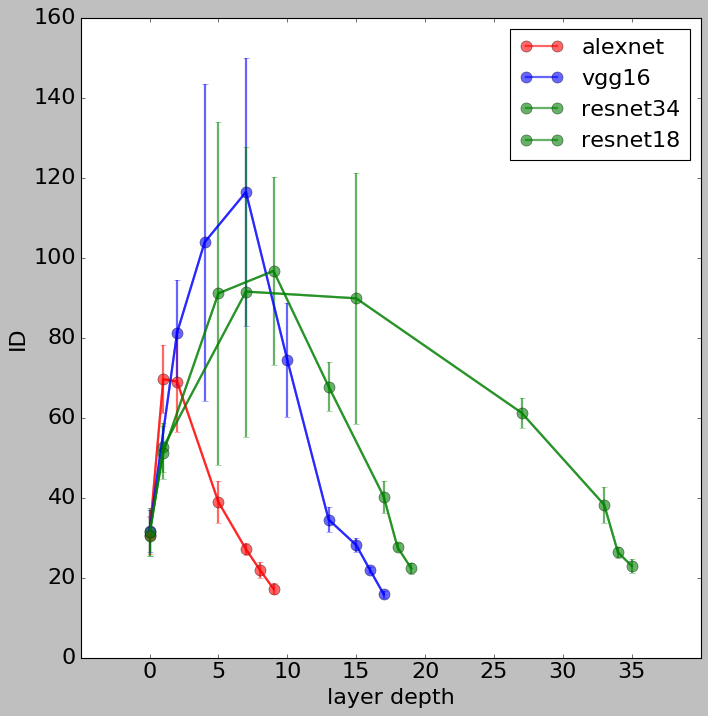

In [19]:
lw = 2
alpha=0.6
ms = 10
fs = 20

fig=plt.figure(figsize=(10,10))
for i,arch in enumerate(['alexnet','vgg16','resnet34','resnet18']):
    nlayers = ID[arch].shape[1]
    rdepths = Depths[arch]/Depths[arch][-1]
        
    plt.plot(Depths[arch], np.mean(ID[arch][0:-1,:],0), '-o'+get_color(arch), 
             markersize=ms, alpha=alpha, linewidth=lw, label=arch)
    
    plt.errorbar(Depths[arch], np.mean(ID[arch][0:-1,:],0), yerr=np.std(ID[arch][0:-1,:],0), 
                 fmt='-'+get_color(arch), alpha=alpha, linewidth=lw)
    
plt.ylabel('ID',fontsize=fs)
plt.xlabel('layer depth',fontsize=fs)
plt.xlim(-5,40)
plt.xticks(np.arange(0,8)*5,fontsize=fs)
plt.yticks(fontsize=fs)

plt.legend(fontsize=fs)

plt.show()

In [20]:
ms = 10
msexp = [1,
         1,1.1,1.2,1.3,
         1,1.1,1.2,1.3,
         1,1.1,1.2,1.3,1.4]

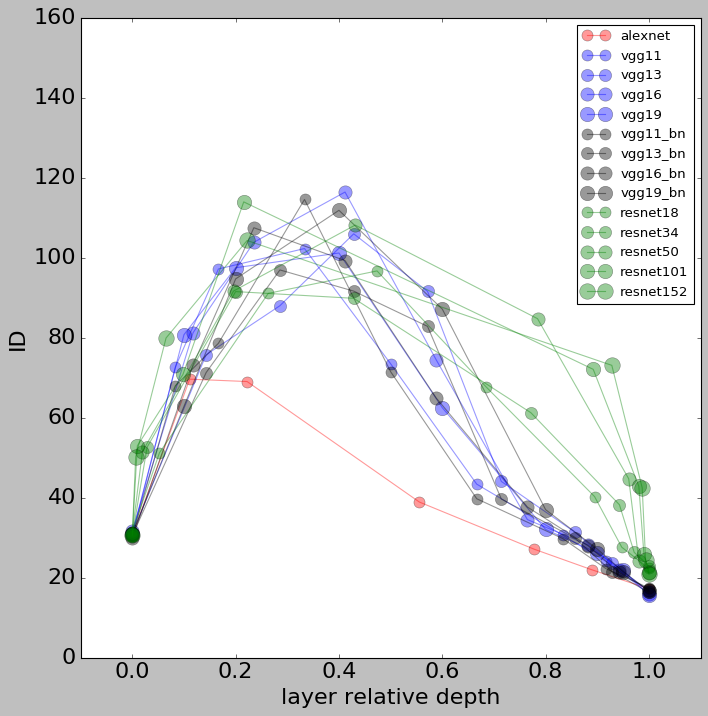

In [21]:
lw = 1
alpha=0.4
ms = 10
fs =20

fig=plt.figure(figsize=(10,10))
for i,arch in enumerate(archs):
    nlayers = ID[arch].shape[1]
    rdepths = Depths[arch]/Depths[arch][-1]
    
    plt.plot(rdepths, np.mean(ID[arch][0:-1,:],0), '-o'+get_color(arch), 
             markersize=ms*msexp[i], alpha=alpha, linewidth=lw, label=arch)
    
plt.xlabel('layer relative depth',fontsize=fs)
plt.ylabel('ID',fontsize=fs)
 
plt.xlim(-0.1,1.1)
plt.ylim([0,160])
plt.legend(fontsize=12)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.show()